# Car Evaluation 🚗 2.5 (McQueen Edition)
   
## Lab Seven: Wide and Deep Network Architectures
   
### Justin Ledford, Luke Wood, Traian Pop

In [1]:
%matplotlib inline
import numpy as np
import plotly
import pandas as pd
import matplotlib.pyplot as plt
import time
import sys
import requests

import warnings
warnings.filterwarnings('ignore')

## Dataset Selection

Select a dataset identically to lab one. That is, the dataset must be table data. In terms of generalization performance, it is helpful to have a large dataset for building a wide and deep network. It is also helpful to have many different categorical features to create the embeddings and cross-product embeddings. It is fine to perform binary classification or multi-class classification.
https://archive.ics.uci.edu/ml/machine-learning-databases/adult/

___ 

## Preparation (40 points total)
   
### [10 points] Define and prepare your class variables. Use proper variable representations (int, float, one-hot, etc.). Use pre-processing methods (as needed) for dimensionality reduction, scaling, etc. Remove variables that are not needed/useful for the analysis. Describe the final dataset that is used for classification/regression (include a description of any newly formed variables you created). 
   
### [10 points] Identify groups of features in your data that should be combined into cross-product features.
   
### [10 points] Choose and explain what metric(s) you will use to evaluate your algorithm’s performance. You should give a detailed argument for why this (these) metric(s) are appropriate on your data. That is, why is the metric appropriate for the task (e.g., in terms of the business case for the task). Please note: rarely is accuracy the best evaluation metric to use. Think deeply about an appropriate measure of performance.
   
### [10 points] Choose the method you will use for dividing your data into training and testing (i.e., are you using Stratified 10-fold cross validation? Shuffle splits? Why?). Explain why your chosen method is appropriate or use more than one method as appropriate. Convince me that your cross validation method is a realistic mirroring of how an algorithm would be used in practice. 
___

In [2]:
import pandas as pd
import numpy as np
import requests


# Get column names
r = requests.get('https://raw.githubusercontent.com/LukeWoodSMU/WillBeRenamed/master/col_names.txt')

if r.status_code == 200:
    columns = r.text.replace(" ","_").replace("'","").split('\n')[:-1]
else:
    print('Error loading column names')

In [3]:
print(columns)

['age', 'class_of_worker', 'industry_code', 'occupation_code', 'education', 'wage_per_hour', 'enrolled_in_edu_inst_last_wk', 'marital_status', 'major_industry_code', 'major_occupation_code', 'race', 'hispanic_origin', 'sex', 'member_of_a_labor_union', 'reason_for_unemployment', 'full_or_part_time_employment_stat', 'capital_gains', 'capital_losses', 'dividends_from_stocks', 'tax_filer_status', 'region_of_previous_residence', 'state_of_previous_residence', 'detailed_household_and_family_stat', 'detailed_household_summary_in_household', 'migration_code-change_in_msa', 'migration_code-change_in_reg', 'migration_code-move_within_reg', 'live_in_this_house_1_year_ago', 'migration_prev_res_in_sunbelt', 'num_persons_worked_for_employer', 'family_members_under_18', 'country_of_birth_father', 'country_of_birth_mother', 'country_of_birth_self', 'citizenship', 'own_business_or_self_employed', 'fill_inc_questionnaire_for_veterans_admin', 'veterans_benefits', 'weeks_worked_in_year', 'year', 'income']

In [6]:
df_train = pd.read_csv(
        'https://archive.ics.uci.edu/ml/machine-learning-databases/census-income-mld/census-income.data.gz',
        compression='gzip', header=None, index_col=False)


df_test = pd.read_csv(
        'https://archive.ics.uci.edu/ml/machine-learning-databases/census-income-mld/census-income.test.gz',
        compression='gzip', header=None, index_col=False)


# Remove weight columns
df_train.drop(24, 1, inplace=True)
df_test.drop(24, 1, inplace=True)

df_train.columns = columns
df_test.columns = columns

# Remove rows with missing data and reset index
df_train.replace(to_replace=' ?',value=np.nan, inplace=True)
df_train.dropna(inplace=True)
df_train.reset_index()

df_test.replace(to_replace=' ?',value=np.nan, inplace=True)
df_test.dropna(inplace=True)
df_test.reset_index()

df_train.head()

,age,class_of_worker,industry_code,occupation_code,education,wage_per_hour,enrolled_in_edu_inst_last_wk,marital_status,major_industry_code,major_occupation_code,...,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship,own_business_or_self_employed,fill_inc_questionnaire_for_veterans_admin,veterans_benefits,weeks_worked_in_year,year,income
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
6,42,Private,34,3,Bachelors degree(BA AB BS),0,Not in universe,Married-civilian spouse present,Finance insurance and real estate,Executive admin and managerial,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
9,34,Private,4,37,Some college but no degree,0,Not in universe,Married-civilian spouse present,Construction,Machine operators assmblrs & inspctrs,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.


In [7]:
# Process data:

# check income values consistent (only 2 values)

# replace categorical with one hot encoding
# scale continuous

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler

labels = dict() 

r = requests.get('https://raw.githubusercontent.com/LukeWoodSMU/WillBeRenamed/master/categorical.txt')
categorical_labels = r.text.replace(" ","_").replace("'","").split('\n')[:-1]
print(categorical_labels)

for col in categorical_labels + ['income']:
    # strip extra space in strings
    if df_train[col].dtype == 'object':
        df_train[col] = df_train[col].str.strip()
    if df_test[col].dtype == 'object':
        df_test[col] = df_test[col].str.strip()
        
    # convert to ints for one hot encoder to work
    
    # keep labels for reference 
    labels[col] = list(set(df_train[col].unique()) | set(df_test[col].unique()))
    
    df_train[col].replace(to_replace=labels[col],
                            value=np.arange(len(labels[col])),
                            inplace=True)
    df_test[col].replace(to_replace=labels[col],
                            value=np.arange(len(labels[col])),
                            inplace=True)
    
    
r = requests.get('https://raw.githubusercontent.com/LukeWoodSMU/WillBeRenamed/master/continuous.txt')
continuous_labels = r.text.replace(" ","_").replace("'","").split('\n')[:-1]


for col in continuous_labels:
    df_train[col] = df_train[col].astype(np.float32)
    df_test[col] = df_test[col].astype(np.float32)
    
    ss = StandardScaler()
    df_train[col] = ss.fit_transform(df_train[col].values.reshape(-1, 1))
    df_test[col] = ss.transform(df_test[col].values.reshape(-1, 1))
    
continuous_labels

['class_of_worker', 'industry_code', 'occupation_code', 'education', 'enrolled_in_edu_inst_last_wk', 'marital_status', 'major_industry_code', 'major_occupation_code', 'race', 'hispanic_origin', 'sex', 'member_of_a_labor_union', 'reason_for_unemployment', 'full_or_part_time_employment_stat', 'tax_filer_status', 'region_of_previous_residence', 'state_of_previous_residence', 'detailed_household_and_family_stat', 'detailed_household_summary_in_household', 'migration_code-change_in_msa', 'migration_code-change_in_reg', 'migration_code-move_within_reg', 'live_in_this_house_1_year_ago', 'migration_prev_res_in_sunbelt', 'family_members_under_18', 'country_of_birth_father', 'country_of_birth_mother', 'country_of_birth_self', 'citizenship', 'own_business_or_self_employed', 'fill_inc_questionnaire_for_veterans_admin', 'veterans_benefits', 'year']


['age',
 'wage_per_hour',
 'capital_gains',
 'capital_losses',
 'dividends_from_stocks',
 'num_persons_worked_for_employer',
 'weeks_worked_in_year']

In [8]:
import tensorflow as tf
from tensorflow.contrib import learn
from tensorflow.contrib import layers
from tensorflow.contrib.learn.python import SKCompat
from tensorflow.contrib.learn.python.learn.estimators import model_fn as model_fn_lib
tf.logging.set_verbosity(tf.logging.WARN) # control the verbosity of tensor flow

In [9]:
# Let's start with the TF example (manipulated to work with new syntax)
# https://www.tensorflow.org/tutorials/wide_and_deep
def process_input(df, label_header, categ_headers, numeric_headers):
    # input: what ever you need it to be
    # output: (dict of feature columns as tensors), (labels as tensors)
    
    # ========Process Inputs=========
    # Creates a dictionary mapping from each continuous feature column name (k) to
    # the values of that column stored in a constant Tensor.
    continuous_cols = {k: tf.expand_dims( # make it a column vector
                            tf.cast( # cast to a float32
                                tf.constant(df[k].values), 
                                tf.float32), 
                            1)
                       for k in numeric_headers}
    
    # Creates a dictionary mapping from each categorical feature column name (k)
    # to the values of that column stored as constant Tensors (numeric)
    # then use tensor flow to one hot encode them using the given number of classes 
    # name of encoder is **_int need to map only to **
    categorical_cols = {k: tf.one_hot(indices=tf.constant(df[k].values),
                                      depth=len(labels[k])) 
                        for k in categ_headers}
    
    # Merges the two dictionaries into one.
    feature_cols = dict(continuous_cols)
    feature_cols.update(categorical_cols)
    
    # Convert the label column into a constant Tensor.
    label = None
    if label_header is not None:
        label = tf.constant(df[label_header].values)
        
    return feature_cols, label

In [11]:
# update the model to take input features as a dictionary
def MLP(dict_features, targets, mode):
    # the prototype for this function is as follows
    # input:  (features, targets) 
    # output: (predictions, loss, train_op)
    
    #=======DECODE FEATURES================
    # now let's combine the tensors from the input dictionary
    # into a list of the feature columns
    features = [dict_features[x] for x in continuous_labels+categorical_labels]
   
    # also add in the one hot encoded features
    for col in categorical_labels:
        features.append(dict_features[col])
    
    # now we can just combine all the features together
    features = tf.concat(values=features,axis=1)
    
    # =====SETUP ARCHITECTURE=====
    # we can use functions from learn to add layers and complexity to the model
    # pass features through one hidden layer with relu activation
    features = layers.relu(features, num_outputs=50) 
    # now pass the features through a fully connected layer
    features = layers.fully_connected(features, num_outputs=1) 
    # and pass them through a sigmoid activation
    output_layer = tf.sigmoid(features) 
    # reshape the output to be one dimensional
    predictions = tf.reshape(output_layer, [-1])
    
    # depending on the mode, we may not want to evaluate these
    loss_mse = None
    train_op = None
    
    # Calculate Loss (for both TRAIN and EVAL modes)
    if mode != learn.ModeKeys.INFER:
        # =====LOSS=======
        # we want to use MSE as our loss function
        loss_mse = tf.losses.mean_squared_error(targets, predictions) 
    
    if mode == learn.ModeKeys.TRAIN:
        # =====OPTIMIZER PARAMS========
        # now let's setup how we want thing to optimize 
        train_op = layers.optimize_loss(
            loss=loss_mse, 
            global_step=tf.contrib.framework.get_global_step(),
            optimizer='Adagrad', # adaptive gradient, so that the learning rate is not SO important 
            learning_rate=0.1)
    
    # what format to have the output in when calling clf.predict?
    predictions_out = predictions>0.5
    
    return model_fn_lib.ModelFnOps(
      mode=mode, predictions={'incomes':predictions_out}, loss=loss_mse, train_op=train_op)


In [77]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import roc_curve, auc

from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.5)

df = df_train.ix[:1000].copy()
#df = df_train.copy()

X = df.drop('income', axis=1).values
y = df['income'].values


# High cost for false negatives on "> 50,000" class

def weighted_recall_score(y_true, y_pred):
    """
    Weight determined by class imbalance
    """
    conf_matrix = confusion_matrix(y_true, y_pred)
    counts = np.bincount(y_true)
    weight = int(1 / (min(counts) / (sum(counts))))
    
    weight_matrix = np.array([
        [0, weight],
        [1, 0]
    ])
                 
    tp = np.sum(np.diagonal(conf_matrix))
    fn = np.sum(weight_matrix * conf_matrix)

    return tp / (tp + fn)

In [28]:
%%time

mlp_rocs = []

for train_index, test_index in sss.split(X, y):
    clf = learn.Estimator(model_fn=MLP)

    # when we provide the process function, they expect us to control the mini-batch
    clf.fit(input_fn=
                lambda:process_input(df.iloc[train_index], 'income',categorical_labels, continuous_labels), 
                steps=500)
    
    y_test = df['income'].iloc[test_index]

    yhat = clf.predict(input_fn=
                       lambda:process_input(df.iloc[test_index], None,categorical_labels, continuous_labels))
    # the output is now an iterable value, so we need to step over it
    yhat = [x['incomes'] for x in yhat]
    print(confusion_matrix(y_test,yhat),
          weighted_recall_score(y_test,yhat))
    
    #mlp_rocs.append(roc_curve(y_test, clf.predict_proba()))

[[  4  11]
 [  3 214]] 0.564766839378
[[  3  12]
 [  1 216]] 0.5475
[[  3  12]
 [  0 217]] 0.55
[[  3  12]
 [  0 217]] 0.55
[[  2  13]
 [  1 216]] 0.526570048309
CPU times: user 26.6 s, sys: 520 ms, total: 27.1 s
Wall time: 12.2 s


## Cross Columns

In [16]:
# https://www.tensorflow.org/tutorials/wide_and_deep
def process_input_cc(df, label_header, categ_headers, numeric_headers):
    # input: what ever you need it to be
    # output: (dict of feature columns as tensors), (labels as tensors)
    
    # ========Process Inputs=========
    # not much changes here, except we leave the numerics as tc.constants
    continuous_cols = {k: tf.reshape(tf.constant(df[k].values), [-1]) for k in numeric_headers}
      
    # and we shift these tensors to be sparse one-hot encoded values
    # Creates a dictionary mapping from each categorical feature column name (k)
    # to the values of that column stored in a tf.SparseTensor.
    categorical_cols = {k: tf.SparseTensor(
                              indices=[[i, 0] for i in range(df[k].size)],
                              values=df[k].astype(str).values,
                              dense_shape=[df[k].size, 1])
                        for k in categ_headers}
    
    # Merges the two dictionaries into one.
    feature_cols = dict(categorical_cols)
    feature_cols.update(continuous_cols)
    
    # Convert the label column into a constant Tensor.
    label = None
    if label_header is not None:
        label = tf.constant(df[label_header].values)
        
    return feature_cols, label

In [17]:
# update the model to take input features as a dictionary
def setup_wide_deep_columns():
    # the prototype for this function is as follows
    # input:  (features, targets) 
    # output: (predictions, loss, train_op)
    
    wide_columns = []
    deep_columns = []
    # add in each of the categorical columns to both wide and deep features
    for col in categorical_labels:
        wide_columns.append(
            layers.sparse_column_with_keys(col, keys=[str(x) for x in labels[col]])
        )
        
        dim = round(np.log2(len(labels[col]))) + 1
        deep_columns.append(
            layers.embedding_column(wide_columns[-1], dimension=dim)
        )
        
    # also add in some specific crossed columns
    cross_columns = [('education','occupation_code'),('country_of_birth_father', 'country_of_birth_mother')]
    for tup in cross_columns:
        wide_columns.append(
            layers.crossed_column(
                [layers.sparse_column_with_keys(tup[0], keys=[str(x) for x in labels[tup[0]]]),
                 layers.sparse_column_with_keys(tup[1], keys=[str(x) for x in labels[tup[1]]])],
            hash_bucket_size=int(1e4))
        )
        
        
    # and add in the regular dense features 
    for col in continuous_labels:
        deep_columns.append(
            layers.real_valued_column(col)
        )
                    
    return wide_columns, deep_columns

In [81]:
%%time

tf.logging.set_verbosity(tf.logging.ERROR)

df = df_train.ix[:2000].copy()
#df = df_train.copy()

X = df.drop('income', axis=1).values
y = df['income'].values

wide_columns, deep_columns = setup_wide_deep_columns()

for col in deep_columns:
    if col.dimension == 0.0:
        print(col)

dnn_roc_auc = []

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.5)

for train_index, test_index in sss.split(X, y):
    clf = learn.DNNLinearCombinedClassifier(
                            linear_feature_columns=wide_columns,
                            dnn_feature_columns=deep_columns,
                            dnn_hidden_units=[100, 50, 25, 5])

    input_wrapper = lambda:process_input_cc(df.iloc[train_index],'income',categorical_labels, continuous_labels)
    output_wrapper = lambda:process_input_cc(df.iloc[test_index],None,categorical_labels, continuous_labels)

    # when we provide the process function, they expect us to control the mini-batch
    clf.fit(input_fn=input_wrapper, steps=500)

    y_test = df['income'].iloc[test_index]

    yhat = clf.predict(input_fn=output_wrapper)

    # the output is now an iterable value, so we need to step over it
    yhat = [x for x in yhat]

    print(confusion_matrix(y_test,yhat),
          accuracy_score(y_test,yhat))
    
    probs = list(clf.predict_proba(input_fn=output_wrapper))
    probs = np.array(probs)[:,1]
    fpr, tpr, _ = roc_curve(y_test, probs)
    dnn_roc_auc.append((fpr, tpr, auc(fpr, tpr)))

[[  1  25]
 [  0 459]] 0.948453608247
[[  0  26]
 [  0 459]] 0.946391752577
[[  6  20]
 [  2 457]] 0.954639175258
[[  4  22]
 [  3 456]] 0.948453608247
[[  2  24]
 [  1 458]] 0.948453608247
CPU times: user 3min 5s, sys: 1.57 s, total: 3min 7s
Wall time: 2min 33s


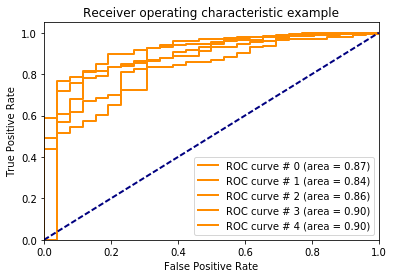

In [83]:
plt.figure()
lw = 2
i = 0
for fpr, tpr, auc_ in dnn_roc_auc:
        plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve # %d (area = %0.2f)' % (i, auc_))
        i += 1
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## Modeling (50 points total)
   
### [20 points] Create a combined wide and deep network to classify your data using tensorflow.
   
### [20 points] Investigate generalization performance by altering the number of layers. Try at least two different deep network architectures. Use the method of cross validation and evaluation metric that you argued for at the beginning of the lab.

### 10 points] Compare the performance of your best wide and deep network to a standard multi-layer perceptron (MLP) using the receiver operating characteristic and area under the curve.
___

## Exceptional Work (10 points total)
   
### One idea: Investigate which cross-product features are most important and hypothesize why.
___